In [1]:
!python -m pip install pyyaml

In [2]:
import sys, os, distutils.core

In [3]:
# !git clone https://github.com/facebookresearch/detectron2.git
# dist = distutils.core.run_setup("./detectron2/setup.py")
# !python -m pip install {' '.join([f"'{x}'" for x in dist.install_requires])}
# sys.path.insert(0, os.path.abspath('./detectron2/'))

fatal: destination path 'detectron2' already exists and is not an empty directory.
The system cannot find the file specified.


In [4]:
import torch, detectron2
!nvcc --version
TORCH_VERSION = ".".join(torch.__version__.split(".")[:2])
CUDA_VERSION = torch.__version__.split("+")[-1]
print("torch: ", TORCH_VERSION, "; cuda: ", CUDA_VERSION)
print("detectron2:", detectron2.__version__)

nvcc: NVIDIA (R) Cuda compiler driver
Copyright (c) 2005-2024 NVIDIA Corporation
Built on Thu_Sep_12_02:55:00_Pacific_Daylight_Time_2024
Cuda compilation tools, release 12.6, V12.6.77
Build cuda_12.6.r12.6/compiler.34841621_0
torch:  2.5 ; cuda:  cpu
detectron2: 0.6


In [5]:
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from cv2 import imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

matplotlib data path: c:\Users\chowd\ProgrammingProjects\NG-PSU-CV-Challenge\venv\lib\site-packages\matplotlib\mpl-data
CONFIGDIR=C:\Users\chowd\.matplotlib
interactive is False
platform is win32
CACHEDIR=C:\Users\chowd\.matplotlib
Using fontManager instance from C:\Users\chowd\.matplotlib\fontlist-v390.json


In [6]:
import os

[10/25 16:49:55 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
URL https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl cached in C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'


c:\Users\chowd\ProgrammingProjects\NG-PSU-CV-Challenge\venv\lib\site-packages\torch\functional.py:534: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\TensorShape.cpp:3596.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Instances(num_instances=6, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[504.1440, 163.8086, 637.2316, 316.1839],
        [391.1011, 229.8184, 508.3324, 319.1171],
        [164.0050, 205.0744, 302.2556, 330.9176],
        [591.0627, 322.6940, 639.2112, 444.6232],
        [367.6739, 283.2537, 585.7112, 475.8249],
        [407.0096,  61.6868, 456.3210, 112.9366]])), scores: tensor([0.9559, 0.9272, 0.8907, 0.8735, 0.8379, 0.7535]), pred_classes: tensor([55, 47, 55, 55, 55, 55])])
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0.
findfont: score(FontEntry(fname='c:\\Users\\chowd\\ProgrammingProjects\\NG-PSU-CV-Challenge\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='normal', variant='normal', weight=400, stretch='normal', size='scalable')) = 10.05
findfont: score(FontEntry(fname='c:\\Users\\chowd\\ProgrammingProjects\\NG-PSU-CV-Challenge\\venv\\lib

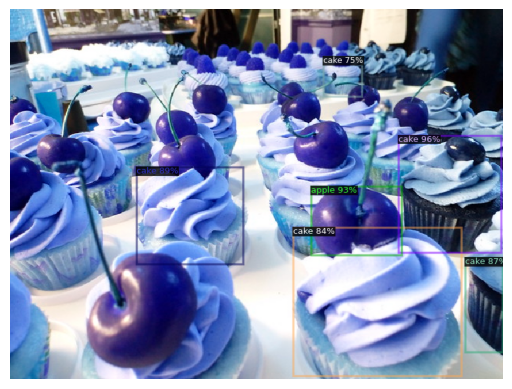

[10/25 16:49:59 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=426, image_width=639, fields=[pred_boxes: Boxes(tensor([[ 66.5446,   1.5895, 225.4958,  76.1169],
        [  8.8621,   5.1766, 639.0000, 414.3169]])), scores: tensor([0.9302, 0.9051]), pred_classes: tensor([40, 60])])


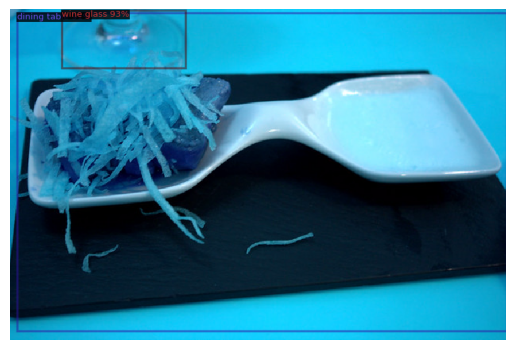

[10/25 16:50:02 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=640, image_width=427, fields=[pred_boxes: Boxes(tensor([[ 84.5265, 110.6712, 238.8678, 312.3071],
        [  1.3886,  89.5261, 426.3307, 632.9055]])), scores: tensor([0.9994, 0.9673]), pred_classes: tensor([41, 60])])


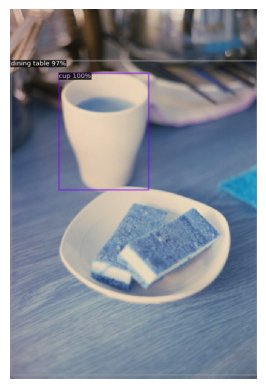

[10/25 16:50:05 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=7, image_height=425, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 10.3566, 281.8501, 104.0967, 386.1655],
        [135.9034, 268.4584, 217.2148, 371.2150],
        [ 81.6635, 229.8693, 104.9624, 271.4482],
        [209.5612, 229.9743, 248.9459, 299.1234],
        [  9.6697, 253.9102, 213.8342, 376.0507],
        [157.0126, 251.2184, 177.8070, 263.4113],
        [  7.1125, 258.2233, 202.0135, 297.3511]])), scores: tensor([0.9952, 0.9919, 0.9872, 0.9693, 0.9540, 0.8929, 0.8430]), pred_classes: tensor([56, 56, 75, 56, 60, 56, 60])])
findfont: Mat

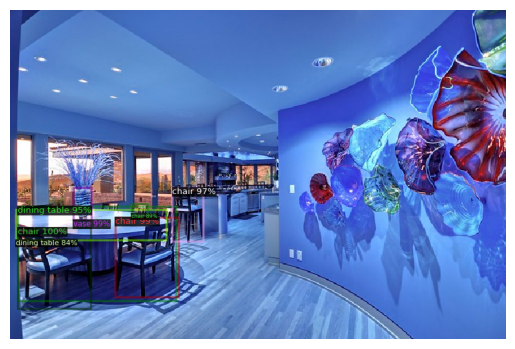

[10/25 16:50:08 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[322.7014, 125.8883, 570.3221, 380.7742],
        [ 72.6143, 117.0824, 279.3313, 366.5334]])), scores: tensor([0.9699, 0.9338]), pred_classes: tensor([56, 56])])


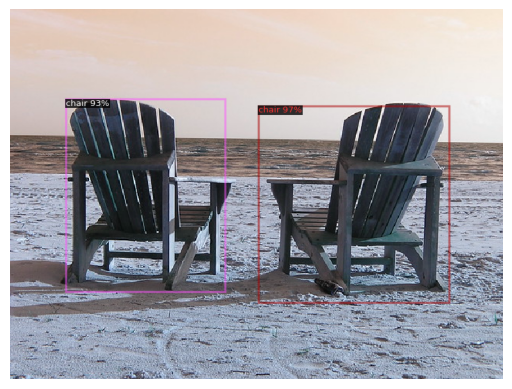

[10/25 16:50:11 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=27, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([[2.6650e+02, 2.4802e+02, 4.2490e+02, 4.2826e+02],
        [1.0401e+00, 3.8494e+02, 1.0340e+02, 6.3188e+02],
        [2.3770e+02, 8.0507e+01, 3.7157e+02, 2.0535e+02],
        [4.9404e+00, 8.0004e+01, 1.2975e+02, 2.1237e+02],
        [5.0023e+02, 2.0476e+02, 6.3906e+02, 3.6965e+02],
        [3.2882e+02, 1.5586e+02, 4.7960e+02, 2.8659e+02],
        [5.3876e+01, 1.4964e+02, 1.8493e+02, 2.7525e+02],
        [3.2554e+02, 4.1972e+02, 5.7446e+02, 6.3558e+02],
        [1.8505e+02, 3.1976e

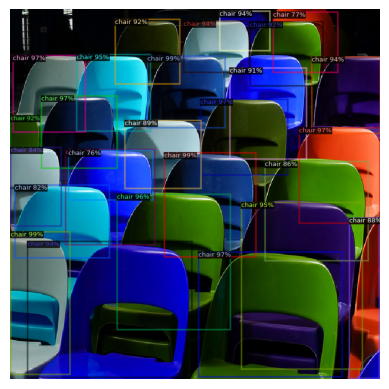

[10/25 16:50:14 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=0, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([], size=(0, 4))), scores: tensor([]), pred_classes: tensor([], dtype=torch.int64)])


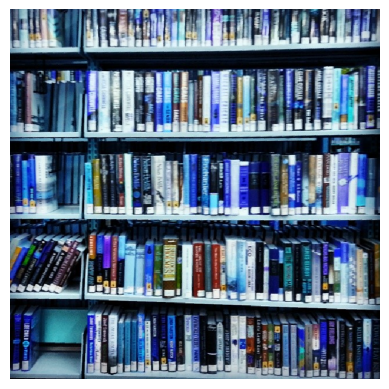

[10/25 16:50:17 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=3, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 78.9490, 174.3553, 219.4098, 305.2983],
        [450.6011,  72.3553, 623.6351, 240.4310],
        [  0.0000,   0.0000, 634.1751, 473.4371]])), scores: tensor([0.9938, 0.9175, 0.8399]), pred_classes: tensor([54, 45, 60])])


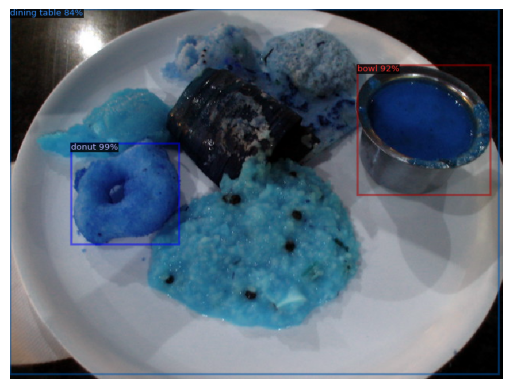

[10/25 16:50:20 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=8, image_height=3000, image_width=4000, fields=[pred_boxes: Boxes(tensor([[2721.5586,  225.6256, 3546.9846,  744.9196],
        [1794.0985,  721.7764, 2875.0164, 1432.0214],
        [ 428.5219, 1364.0188, 1739.0883, 2317.6311],
        [2185.8899, 2258.1541, 3034.0352, 2985.4504],
        [1592.6066, 1715.2700, 2390.1836, 2403.4111],
        [ 940.8594, 2073.5352, 1911.4531, 2663.6616],
        [1265.9794, 2283.7148, 2232.6033, 2955.8962],
        [1476.0509,  918.8612, 2140.9211, 1700.9703]])), scores: tensor([0.9935, 0.9932, 0.9912, 0.9874, 0.9674, 

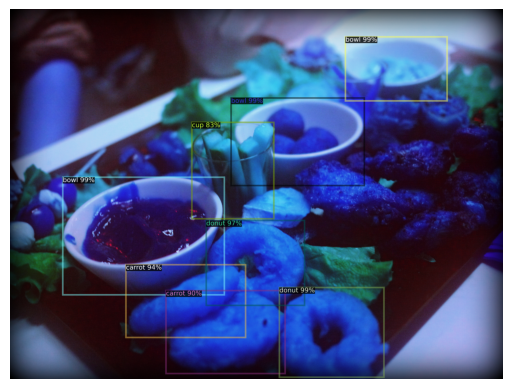

[10/25 16:50:24 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=0, image_height=640, image_width=480, fields=[pred_boxes: Boxes(tensor([], size=(0, 4))), scores: tensor([]), pred_classes: tensor([], dtype=torch.int64)])


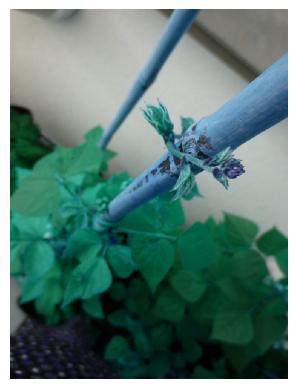

[10/25 16:50:27 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=482, image_width=639, fields=[pred_boxes: Boxes(tensor([[295.4715, 158.8439, 374.7961, 327.5584],
        [180.2014, 279.4110, 278.0395, 438.0730]])), scores: tensor([0.9968, 0.9657]), pred_classes: tensor([ 0, 58])])


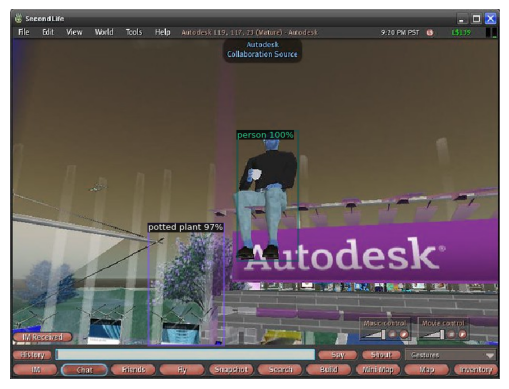

[10/25 16:50:29 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 16.9338, 172.5474,  62.1235, 268.1857],
        [152.2163, 159.3510, 197.6028, 219.9776]])), scores: tensor([0.9885, 0.9699]), pred_classes: tensor([0, 0])])


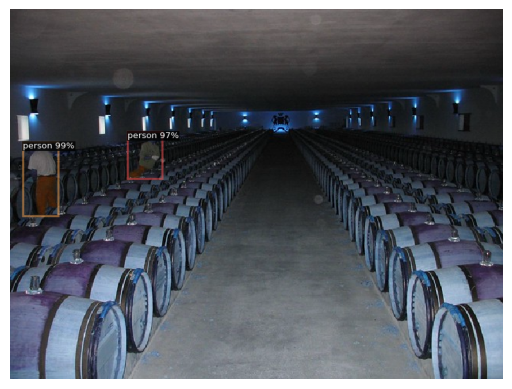

[10/25 16:50:32 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=1, image_height=640, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 32.7704, 470.9306, 272.2401, 625.2020]])), scores: tensor([0.7678]), pred_classes: tensor([53])])


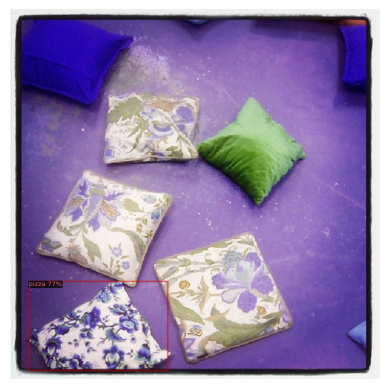

[10/25 16:50:34 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=1, image_height=480, image_width=640, fields=[pred_boxes: Boxes(tensor([[ 47.9288, 120.3710,  69.7924, 182.6773]])), scores: tensor([0.7686]), pred_classes: tensor([73])])


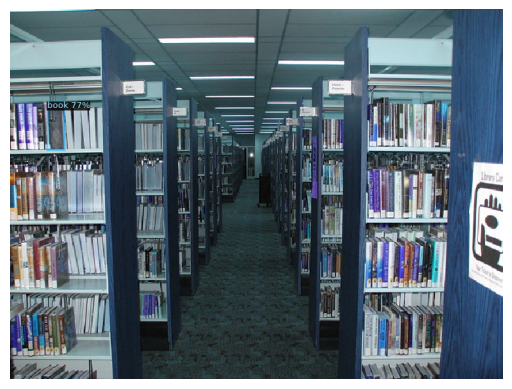

[10/25 16:50:36 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=8, image_height=640, image_width=427, fields=[pred_boxes: Boxes(tensor([[372.2503, 374.7496, 423.4687, 427.2682],
        [ 21.8254, 191.7374,  38.7123, 231.5500],
        [ 16.1916, 447.6075, 101.6495, 482.0981],
        [ 30.4529, 252.3169,  42.9932, 277.7585],
        [  3.2442, 319.0348,  42.6296, 369.5977],
        [380.6512, 457.1574, 426.5272, 536.6393],
        [ 11.7826, 250.9075,  24.6916, 277.6640],
        [ 22.3190, 251.5511,  33.6874, 277.1843]])), scores: tensor([0.9150, 0.8896, 0.8446, 0.7984, 0.7961, 0.7874, 0.7689, 0.7569]), pred_cla

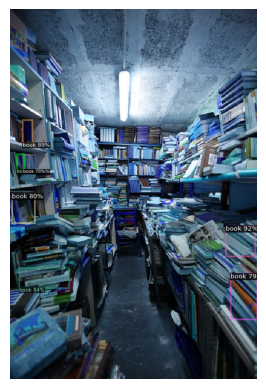

[10/25 16:50:40 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=418, image_width=640, fields=[pred_boxes: Boxes(tensor([[132.5079, 138.1481, 621.3857, 337.9249],
        [251.2904,  69.3127, 416.6564, 263.9002]])), scores: tensor([0.9886, 0.9787]), pred_classes: tensor([8, 0])])


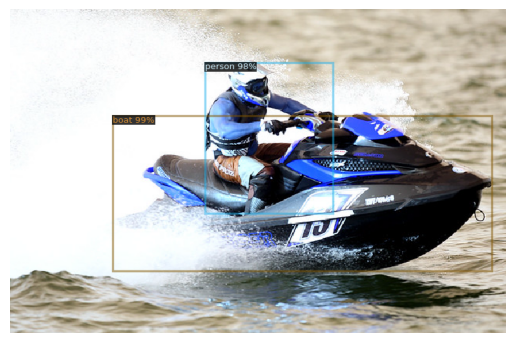

[10/25 16:50:43 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=0, image_height=427, image_width=640, fields=[pred_boxes: Boxes(tensor([], size=(0, 4))), scores: tensor([]), pred_classes: tensor([], dtype=torch.int64)])


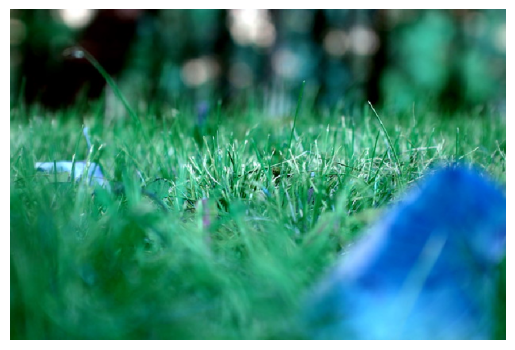

[10/25 16:50:45 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=6, image_height=427, image_width=640, fields=[pred_boxes: Boxes(tensor([[1.1847e+02, 3.6032e-01, 2.2744e+02, 2.6557e+02],
        [5.6423e+01, 3.9196e+01, 6.4000e+02, 4.2059e+02],
        [4.0669e+02, 8.1547e+01, 5.6949e+02, 1.6525e+02],
        [4.4069e+02, 4.2445e+00, 4.9413e+02, 1.3439e+02],
        [4.8688e+02, 1.5374e+01, 5.4723e+02, 1.3191e+02],
        [5.7173e+02, 7.1018e+01, 6.3932e+02, 1.2333e+02]])), scores: tensor([0.9944, 0.9854, 0.9828, 0.9460, 0.8704, 0.7813]), pred_classes: tensor([39, 60, 45, 39, 39, 48])])


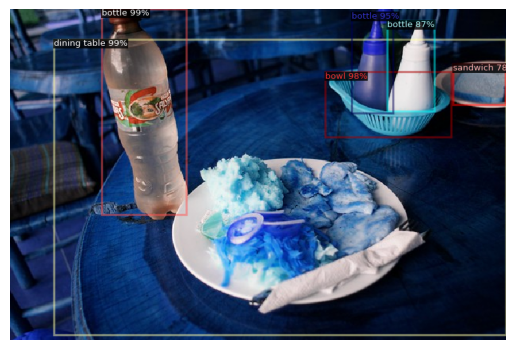

[10/25 16:50:48 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=640, image_width=427, fields=[pred_boxes: Boxes(tensor([[343.7609,  18.7604, 413.5435,  85.0184],
        [ 38.1630,  18.3732, 362.8702, 629.5904]])), scores: tensor([0.9705, 0.7647]), pred_classes: tensor([74,  0])])


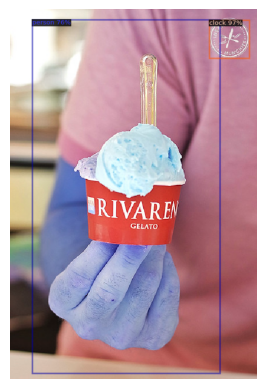

[10/25 16:50:51 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600/model_final_f10217.pkl ...
[Checkpointer] Loading from C:\Users\chowd/.torch/iopath_cache\detectron2/COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x/137849600\model_final_f10217.pkl ...
Reading a file from 'Detectron2 Model Zoo'
Instances(num_instances=2, image_height=1524, image_width=2032, fields=[pred_boxes: Boxes(tensor([[1394.2144, 1252.2941, 1654.9626, 1495.2488],
        [ 958.8431,  980.4915, 1016.0681, 1081.7261]])), scores: tensor([0.9638, 0.7762]), pred_classes: tensor([56,  0])])
findfont: Matching sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=22.8.
findfont: score(FontEntry(fname='c:\\Users\\chowd\\ProgrammingProjects\\NG-PSU-CV-Challenge\\venv\\lib\\site-packages\\matplotlib\\mpl-data\\fonts\\ttf\\STIXSizThreeSymReg.ttf', name='STIXSizeThreeSym', style='norm

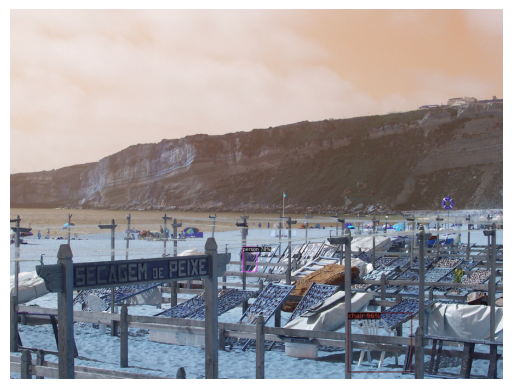

In [7]:
import matplotlib.pyplot as plt
# Define the folder path
folder_path = '../data/Images/'

# Loop through all files in the folder
for filename in os.listdir(folder_path):
    # Check if the file is an image (you can adjust extensions as needed)
    if filename.endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp')):
        # Create the full file path
        image_path = os.path.join(folder_path, filename)

        # Read the image
        im = cv2.imread(image_path)

        # Configure model
        cfg = get_cfg()
        cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
        cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.75  # Set threshold for this model
        cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")

        # Set the model to run on CPU instead of CUDA
        cfg.MODEL.DEVICE = 'cpu'  # Use 'cpu' instead of 'cuda'

        predictor = DefaultPredictor(cfg)

        # Get the predictions
        outputs = predictor(im)

        # Extract the instances without the mask information
        instances = outputs["instances"].to("cpu")

        # Remove the mask predictions from the output
        instances.remove("pred_masks")
        print(instances)

        # Visualize bounding boxes and labels only
        v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
        out = v.draw_instance_predictions(instances)

        # Show the output image
        plt.imshow(out.get_image()[:, :, ::-1])
        plt.axis('off')
        plt.show()